In [1]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import time
import datetime

# Load data

In [3]:
training_values = pd.read_csv("../data/training_set_values.csv")
training_labels = pd.read_csv("../data/training_set_labels.csv")

test_values = pd.read_csv("../data/test_set_values.csv")

In [4]:
dataset = training_values.join(other = training_labels.set_index('id'), on='id')

In [5]:
dataset.head().T

,0,1,2,3,4
id,69572,8776,34310,67743,19728
amount_tsh,6000,0,25,0,0
date_recorded,2011-03-14,2013-03-06,2013-02-25,2013-01-28,2011-07-13
funder,Roman,Grumeti,Lottery Club,Unicef,Action In A
gps_height,1390,1399,686,263,0
installer,Roman,GRUMETI,World vision,UNICEF,Artisan
longitude,34.9381,34.6988,37.4607,38.4862,31.1308
latitude,-9.85632,-2.14747,-3.82133,-11.1553,-1.82536
wpt_name,none,Zahanati,Kwa Mahundi,Zahanati Ya Nanyumbu,Shuleni
num_private,0,0,0,0,0


In [6]:
dataset.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [7]:
dataset.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


# Prepare data

In [8]:
dataset = dataset.drop(['id'], axis=1)

## Geodata

In [9]:
def plot_geodata(dataset: pd.DataFrame): 
    gdf = geopandas.GeoDataFrame(training_values.copy(), 
                                 geometry=geopandas.points_from_xy(dataset.longitude, dataset.latitude))
    world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
    ax = world[world.continent == 'Africa'].plot(color='white', edgecolor='black')

    gdf.plot(ax=ax, color='red',  figsize=(64, 64))

    plt.show()

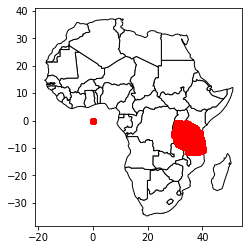

In [10]:
plot_geodata(dataset)

### Dataset has zero-longitude data, replace with mean values

In [11]:
dataset['longitude'] = dataset['longitude'].replace(0, dataset['longitude'].mean())

In [12]:
dataset.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,35.116960,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,2.573963,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,29.607122,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.354079,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


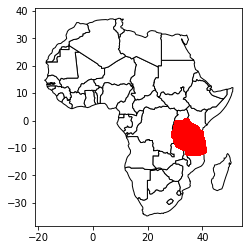

In [13]:
plot_geodata(dataset)

## Convert booleans to string
Easier to work with later, handle as generic category

In [14]:
def convert_column_to_string(dataset, column_name):
    dataset[column_name] = [str(x) for x in dataset[column_name]]

In [15]:
convert_column_to_string(dataset, 'permit')
convert_column_to_string(dataset, 'public_meeting')

## List categorical columns

In [16]:
categorical_columns = ['funder',
       'installer', 'wpt_name', 
       'basin', 'subvillage', 'region', 'lga',
       'ward', 'public_meeting',
       'scheme_management', 'scheme_name', 'permit',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group',
        
        'status_group'] #result column
data_columns = ['date_recorded', 'construction_year']

##  Handle N/A values

In [17]:
dataset.isna().sum()

amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting               0
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                       0
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [18]:
for column in categorical_columns:
    dataset[column] = dataset[column].fillna('n/a')

## Encode categorical columns

In [19]:
for column in categorical_columns:
    le = LabelEncoder()
    le.fit(dataset[column])
    
    dataset[column] = le.transform(dataset[column])

## Handle date columns
Convert to epoch time

In [20]:
def convert_date_column_to_epoch(values, column, timestamp_format="%Y-%m-%d"):
    values[column] = [ datetime.datetime.strptime(x, timestamp_format).timestamp() for x in values[column]]

In [21]:
convert_date_column_to_epoch(dataset, 'date_recorded')

## Drop excess columns

### Drop 'recorded_by' because it has only one category value

In [22]:
dataset.drop('recorded_by',1, inplace=True)

### Drop columns which can be derived from other columns
- https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
- https://en.wikipedia.org/wiki/Uncertainty_coefficient

In [23]:
drop_columns = ['region', 
                'extraction_type_group', 'extraction_type_class', 
                'management_group', 
                'payment', 
                'quality_group', 
                'quantity', 
                'source_type', 'source_class', 
                'waterpoint_type_group']
dataset.drop(drop_columns,1, inplace=True)

## Scale/normalize all columns

In [24]:
def scale_columns(dataset: pd.DataFrame):
    scaler = StandardScaler()
    dataset = scaler.fit_transform(dataset)
    #dataset[values.columns] = scaler.fit_transform(dataset[dataset.columns])

In [25]:
scale_columns(dataset)

## Data prepared

In [26]:
dataset.head().T

,0,1,2,3,4
amount_tsh,6.000000e+03,0.000000e+00,2.500000e+01,0.000000e+00,0.000000e+00
date_recorded,1.300054e+09,1.362517e+09,1.361740e+09,1.359320e+09,1.310504e+09
funder,1.369000e+03,4.690000e+02,8.250000e+02,1.741000e+03,2.000000e+01
gps_height,1.390000e+03,1.399000e+03,6.860000e+02,2.630000e+02,0.000000e+00
installer,1.518000e+03,5.450000e+02,2.048000e+03,1.852000e+03,1.190000e+02
longitude,3.493809e+01,3.469877e+01,3.746066e+01,3.848616e+01,3.113085e+01
latitude,-9.856322e+00,-2.147466e+00,-3.821329e+00,-1.115530e+01,-1.825359e+00
wpt_name,3.739900e+04,3.719500e+04,1.457200e+04,3.728500e+04,3.552900e+04
num_private,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
basin,1.000000e+00,4.000000e+00,5.000000e+00,7.000000e+00,4.000000e+00


# Split dataset

In [27]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

# Train models

In [29]:
models_result = {}

In [30]:
def update_result_print(models_result, model_name, result):
    models_result[model_name] = result
    print(f'"{model_name}" has accuracy: {result}') 

In [31]:
def plot_features_importances(classifier, X_train):
    series = pd.Series(classifier.feature_importances_, index=X_train.columns).sort_values(ascending=True)
    series = series.plot(kind='barh', figsize=(10,10))
    plt.xlabel('Feature importance')
    plt.ylabel('Features')
    plt.show()

## Random forest

In [32]:
def random_forest(X_train, X_test, y_train, y_test):
    from sklearn.ensemble import RandomForestClassifier
    clf = RandomForestClassifier(max_depth=25, n_estimators = 42, criterion = 'entropy', random_state = 0)

    clf.fit(X_train, y_train)
    
    return clf, clf.score(X_test, y_test)

"Random forest" has accuracy: 0.8097643097643098


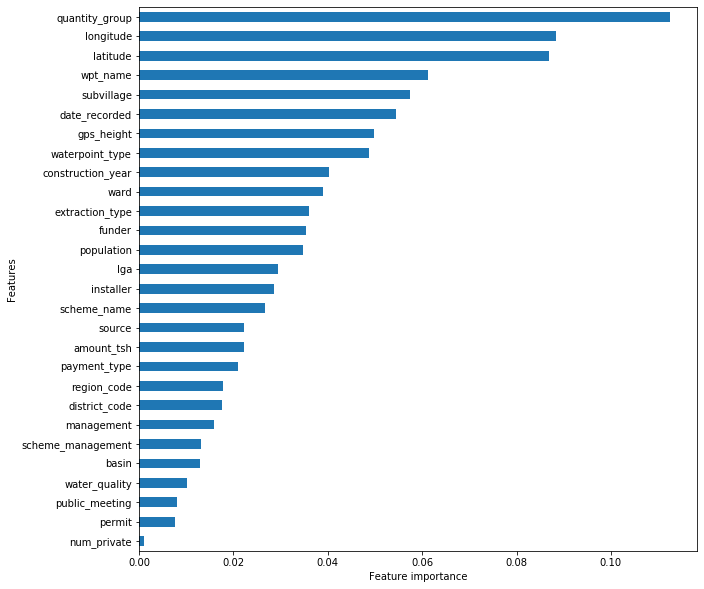

In [33]:
clf, accuracy = random_forest(X_train, X_test, y_train, y_test)
update_result_print(models_result, 'Random forest', accuracy)
plot_features_importances(clf, X_train)

## Naive Bayes

In [34]:
def gaussian_nb(X_train, X_test, y_train, y_test):
    from sklearn.naive_bayes import GaussianNB
    clf = GaussianNB()
    
    clf.fit(X_train, y_train)
    
    return clf, clf.score(X_test, y_test)

In [35]:
clf, accuracy = gaussian_nb(X_train, X_test, y_train, y_test)
update_result_print(models_result, 'Naive Bayes', accuracy)
#plot_features_importances(clf, X_train)

"Naive Bayes" has accuracy: 0.41464646464646465


## XGBoost

In [36]:
def xgb(X_train, X_test, y_train, y_test):
    from xgboost import XGBClassifier
    clf = XGBClassifier()
    
    clf.fit(X_train, y_train)
    
    return clf, clf.score(X_test, y_test)

"XGBoost" has accuracy: 0.7463804713804714


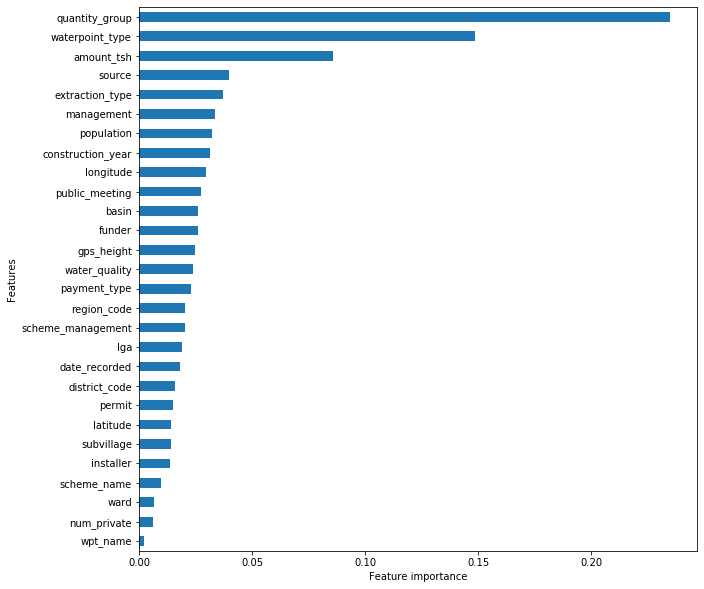

In [37]:
clf, accuracy = xgb(X_train, X_test, y_train, y_test)
update_result_print(models_result, 'XGBoost', accuracy)
plot_features_importances(clf, X_train)

## K-Nearest Neighbors

In [38]:
def k_nearest(X_train, X_test, y_train, y_test):
    from sklearn.neighbors import KNeighborsClassifier
    clf = KNeighborsClassifier(n_neighbors=5)
    
    clf.fit(X_train, y_train)
    
    return clf, clf.score(X_test, y_test)

In [39]:
clf, accuracy = k_nearest(X_train, X_test, y_train, y_test)
update_result_print(models_result, 'K-Nearest Neighbors', accuracy)
#plot_features_importances(clf, X_train)

"K-Nearest Neighbors" has accuracy: 0.5784511784511784


## Multi-layer perceptron

In [40]:
def mlp(X_train, X_test, y_train, y_test):
    from sklearn.neural_network import MLPClassifier
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
    hidden_layer_sizes=(X_train.columns.size, 3), random_state=1)
    
    clf.fit(X_train, y_train)
    
    return clf, clf.score(X_test, y_test)

In [41]:
clf, accuracy = mlp(X_train, X_test, y_train, y_test)
update_result_print(models_result, 'Multi-layer perceptron', accuracy)
#plot_features_importances(clf, X_train)

"Multi-layer perceptron" has accuracy: 0.5424242424242425


## Support Vector Machine

In [42]:
def svm(X_train, X_test, y_train, y_test):
    from sklearn.svm import LinearSVC #better for large dataset then SVC
    clf = LinearSVC()
    
    clf.fit(X_train, y_train)
    
    return clf, clf.score(X_test, y_test)

In [43]:
clf, accuracy = svm(X_train, X_test, y_train, y_test)
update_result_print(models_result, 'Support Vector Machine', accuracy)
#plot_features_importances(clf, X_train)

"Support Vector Machine" has accuracy: 0.5424242424242425


/Users/evilkhaoskat/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Results

In [45]:
for k,v in sorted(models_result.items(), key=lambda entry:entry[1], reverse=True):
    print(f'{k:25s} {v}')

Random forest             0.8097643097643098
XGBoost                   0.7463804713804714
K-Nearest Neighbors       0.5784511784511784
Multi-layer perceptron    0.5424242424242425
Support Vector Machine    0.5424242424242425
Naive Bayes               0.41464646464646465
